<a href="https://colab.research.google.com/github/HarivigneshD/HTML_webpage/blob/main/Stress_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOW-PASS

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/p2l.csv')
df.head(10)

,Trial 1:0back,Trial 6:0back
0,32.862,34.755
1,32.839,34.676
2,32.838,34.597
3,32.861,34.517
4,32.910,34.436
5,32.985,34.356
6,33.086,34.275
7,33.211,34.195
8,33.358,34.115
9,33.523,34.037


Text(0.5, 1.0, 'PPG Signal')

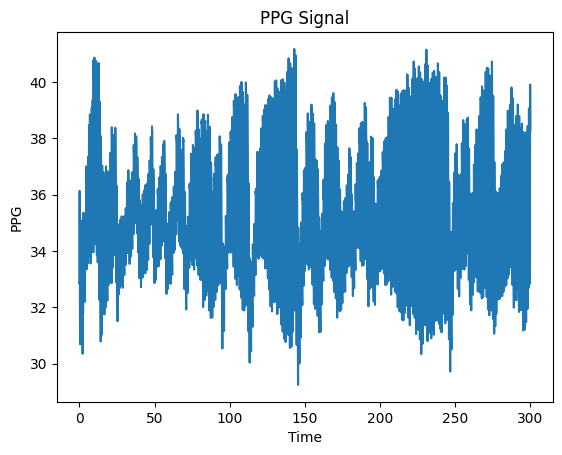

In [8]:
ppg = df['Trial 1:0back']

sampling_rate = 256

time = np.arange(len(ppg))/ sampling_rate

plt.plot(time, ppg)
plt.xlabel('Time')
plt.ylabel('PPG')
plt.title('PPG Signal')

Text(0.5, 1.0, 'PPG Signal')

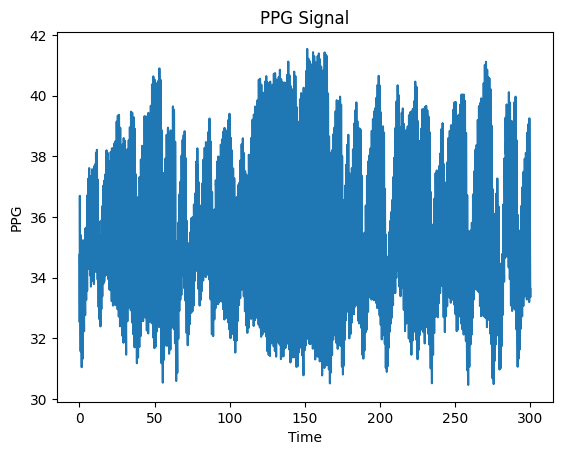

In [9]:
ppg = df['Trial 6:0back']

sampling_rate = 256

time = np.arange(len(ppg))/ sampling_rate

plt.plot(time, ppg)
plt.xlabel('Time')
plt.ylabel('PPG')
plt.title('PPG Signal')

*****Introduction to Empirical Mode Decomposition (EMD)*****

### Imagine You’re Listening to a Song 🎵

A song usually has:

* A **beat** (like drums – fast and repetitive),
* A **melody** (like a guitar or singer – smoother),
* And maybe some **slow background sounds**.

All of this is mixed together in one sound wave.

But what if you want to hear each part **separately**?

---

### EMD Is Like a Magical Ear 👂✨

EMD is a **magical tool** that listens to messy, mixed-up signals and **pulls out the different parts**, one by one — from **fastest** to **slowest**.

It gives you:

1. The **fast wiggly part** (like the beat),
2. The **medium part** (like the melody),
3. The **slow smooth part** (like background hums).

Each part is called an **IMF** (Intrinsic Mode Function) — think of them like layers of the song!

---

### Why Do We Use It?

In real life, signals are messy:

* Your heartbeat,
* Earthquake waves,
* Stock market prices...

EMD helps scientists and engineers **break those signals** into smaller, more understandable parts.

---

### In Short:

> **EMD is like peeling an onion 🧅 of sound or data — one layer at a time — to see what's really going on inside!**



In [11]:
%%capture
!pip install EMD-signal

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from scipy.signal import hilbert
from PyEMD import EMD
from os import listdir
pd.options.display.precision = 10


```python
import numpy as np
```

🔹 **`numpy`** is used for **math operations** with arrays (like signals).
🔸 Example: It helps to handle numbers like your heartbeat signal easily and fast.

---

```python
import pandas as pd
```

🔹 **`pandas`** is used to **store and organize data** in tables (like Excel).
🔸 Useful if you have signals from many people or many time points.

---

```python
import matplotlib.pyplot as plt
```

🔹 **`matplotlib.pyplot`** is for **drawing graphs**.
🔸 Helps you **see** the heartbeat or the IMFs after EMD.

---

```python
import sys
```

🔹 **`sys`** helps you **control or get info** about the Python system (like reading input files or handling errors).
🔸 Example: You might use it to get the file name from the command line.

---

```python
from scipy.signal import hilbert
```

🔹 **`hilbert`** from `scipy.signal` is used to calculate the **instantaneous phase and amplitude** of signals.
🔸 It is often used **after EMD** to analyze how the IMFs behave over time — very helpful in heartbeat analysis!

---

```python
from PyEMD import EMD
```

🔹 This imports the **main tool**: Empirical Mode Decomposition.
🔸 You use `EMD()` to **break your heartbeat signal into IMFs**.

---

```python
from os import listdir
```

🔹 This lets you **look at files in a folder**.
🔸 Example: If you have many ECG files in a folder, `listdir()` helps you loop through all of them and analyze each one.

---

```python
pd.options.display.precision = 10
```

🔹 This tells pandas to **show up to 10 decimal points** when printing data.
🔸 Helpful if you're working with **very tiny numbers** in heartbeat or brain signals.

---

### Summary:

| Line         | Purpose                               |
| ------------ | ------------------------------------- |
| `numpy`      | Fast math for arrays/signals          |
| `pandas`     | Organize and read data                |
| `matplotlib` | Plot signals/IMFs                     |
| `sys`        | Work with system (e.g., files/inputs) |
| `hilbert`    | Analyze signal phase/amplitude        |
| `EMD`        | Decompose signal into IMFs            |
| `listdir`    | Load multiple data files              |
| `precision`  | Show detailed decimal numbers         |

---

EMD on LOW sample

In [15]:
print(df.head(10))

col1 = df['Trial 1:0back'].iloc[0:768] #Selecting column 1 dataframe ['Trial 1:0back'] along with 768 rows
S1 = col1.values
t = np.arange(len(col1))/ sampling_rate

print('S shape: ', S1.shape)
print ('T shape: ', t.shape)

   Trial 1:0back  Trial 6:0back
0         32.862         34.755
1         32.839         34.676
2         32.838         34.597
3         32.861         34.517
4         32.910         34.436
5         32.985         34.356
6         33.086         34.275
7         33.211         34.195
8         33.358         34.115
9         33.523         34.037
S shape:  (768,)
T shape:  (768,)


In [16]:
# Compute the IMF with EMD
config = {'spline_kind': 'cubic', 'max_iteration' : 100}
emd = EMD(**config)
imfs = emd(S1, max_imf = 7)
print('imfs = ' + f'{imfs.shape[0]: 4d}')

imfs =    5
